# Ejercicio 2
En este notebook se busca encontrar la distribución de probabilidad del primer momento de falla en el caso de que el proceso sea regenerativo. Para ello se toma el código que entregó el profesor para simular el proceso y se tratará de aplicar el conteo de los pasos que superan el umbral y descartar los que ya lo hicieron en el primer momento.

Además, se deben contar los procesos que pasan por el umbral en un instante dado, y a partir de eso se debe calcular la distribución de probabilidad. Teniendo en cuenta los que pasaron por primera vez para la segunda pasada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate
import time

Elapsed time: 0.0900s
1.0 10000


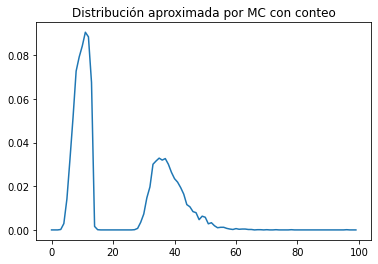

In [14]:
# primero se crea el proceso

x_0 = 1
N = 100

proceso = np.zeros((N,))
proceso[0] = x_0
a1 = 1.01
b1 = 0.75
sigma = 0.5
np.random.seed(32)
u = 5
K = 0.3

# definicion de las iteraciones de MC
M = 10000
PROCESOS = np.zeros((N,M))
PROCESOS[0, :] = x_0
np.random.seed(42)

cuentas = np.zeros((M,))
histogram_MC = np.zeros((N,))

I, J = [13, 26]

# media y varianza analiticas
E = np.zeros((N,))
Var = np.zeros((N,))

E[0] = proceso[0]

start = time.time()

for i in range(I):
    proceso[i + 1] = K + a1 * proceso[i] + np.random.normal(0, sigma)
    PROCESOS[i + 1, :] = K + a1 * PROCESOS[i,:] + np.random.normal(0, sigma, size=(M,))
    
    anterior = np.sum(cuentas)
    checkeo = PROCESOS[i, :] > u
    cuentas[checkeo] = 1
    
    histogram_MC[i] = np.sum(cuentas) - anterior
    
    # media y varianza
    E[i + 1] = K + a1 * E[i]
    Var[i + 1] = a1 ** 2 * Var[i] + sigma**2
    

for i in range(I, J):
    proceso[i + 1] = K + a1 * b1 * proceso[i] + np.random.normal(0, sigma)
    PROCESOS[i + 1, :] = K + a1 * b1 * PROCESOS[i,:] + np.random.normal(0, sigma, size=(M,))

    anterior = np.sum(cuentas)
    # sobre el umbral
    checkeo = PROCESOS[i, :] > u
    cuentas[checkeo] = 1
    
    histogram_MC[i] = np.sum(cuentas) - anterior
    
    # media y varianza
    E[i + 1] = K + a1 * b1 * E[i]
    Var[i + 1] = a1 ** 2 * b1 ** 2 * Var[i] + sigma**2

for i in range(J, int((N-1))):
    proceso[i + 1] = K + a1 * proceso[i] + np.random.normal(0, sigma)
    PROCESOS[i + 1, :] = K + a1 * PROCESOS[i,:] + np.random.normal(0, sigma, size=(M,))
    
    anterior = np.sum(cuentas)
    # sobre el umbral
    checkeo = PROCESOS[i, :] > u
    cuentas[checkeo] = 1
    
    histogram_MC[i] = np.sum(cuentas) - anterior
    
    # media y varianza
    E[i + 1] = K + a1 * E[i]
    Var[i + 1] = a1 ** 2 * Var[i] + sigma**2
end = time.time()
print('Elapsed time: {:.4f}s'.format(end - start))

histogram_MC = histogram_MC / M
# plt.plot(PROCESOS, color='k', alpha=0.1)
# plt.plot(proceso, color='r', lw=3)
# plt.plot(E, color='g', lw=5)
# plt.plot(E - np.sqrt(Var), color='g', lw=5, alpha=0.5)
# plt.plot(E + np.sqrt(Var), color='g', lw=5, alpha=0.5)
# plt.hlines(u,0,N)
# plt.ylim(top=u*1.4, bottom=0)
# plt.title('Simulaciones con Monte Carlo del proceso $a_1={}, b_1={}, k={}, \sigma={}$'.format(a1,b1,K,sigma))
# plt.show()

print(np.sum(histogram_MC), M)
plt.plot(histogram_MC)
plt.title('Distribución aproximada por MC con conteo')
plt.show()

Se pretende simular el filtro de partículas hecho por Francisco

Este filtro requiere calcular de forma analítica (con el modelo del ruido) la media y la varianza del proceso. Luego hay que muestrear la pdf que se produce y sacar los puntos de esa pdf que pasen sobre el umbral.

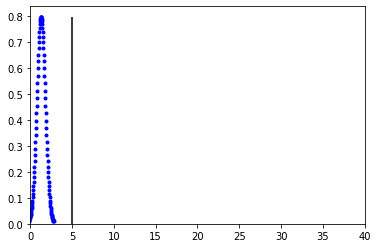

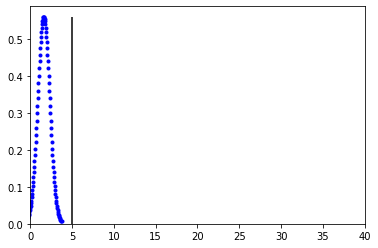

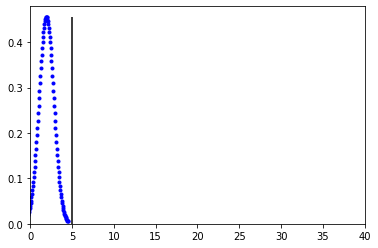

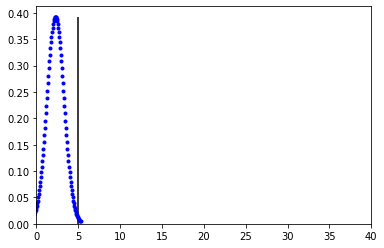

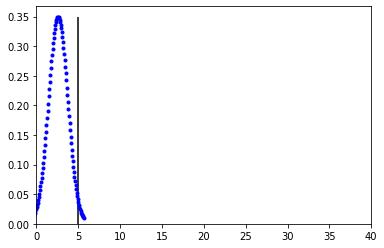

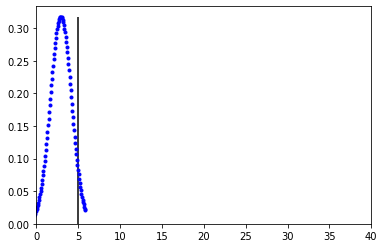

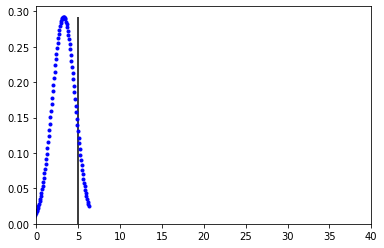

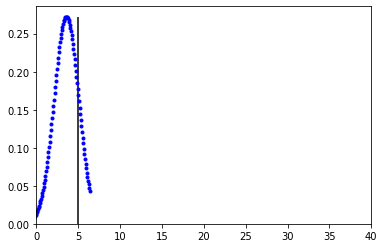

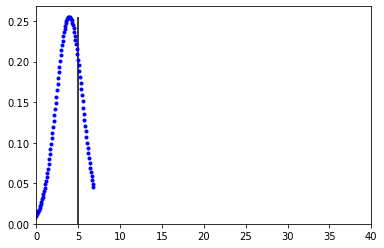

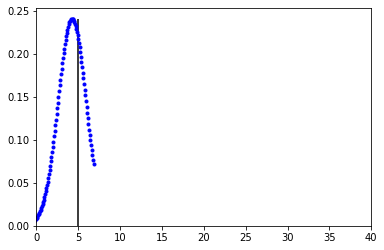

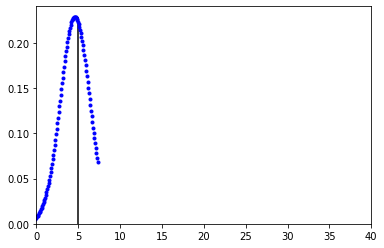

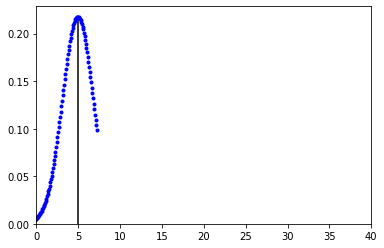

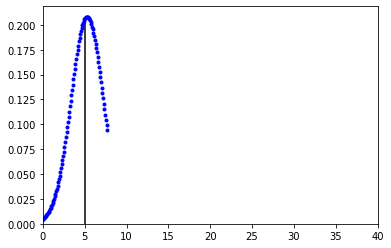

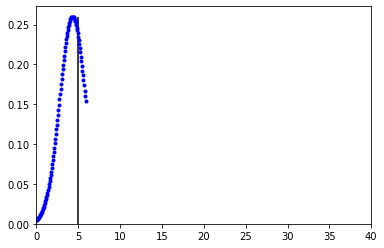

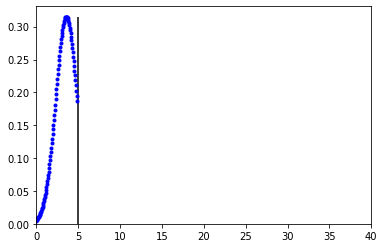

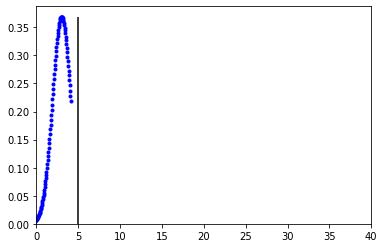

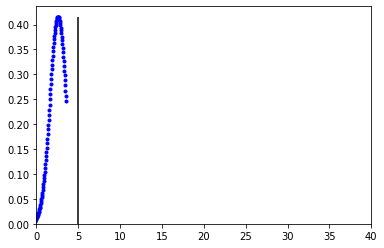

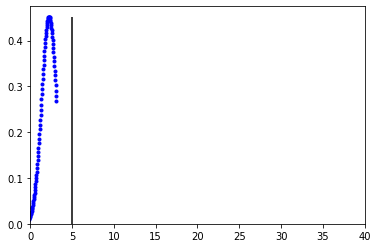

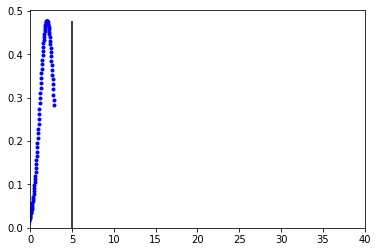

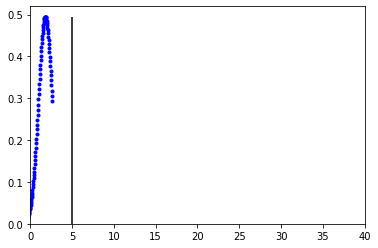

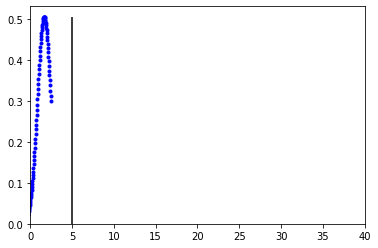

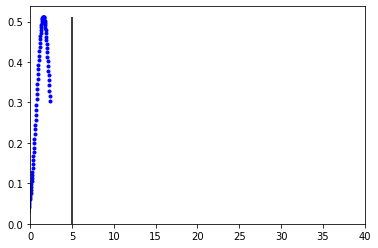

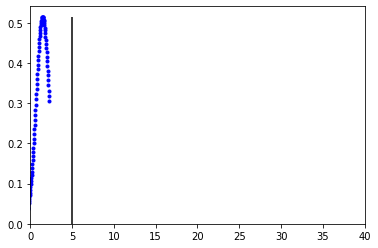

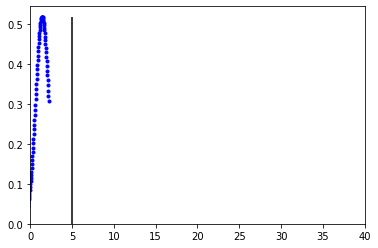

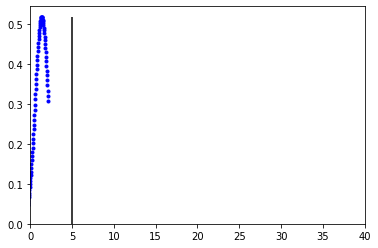

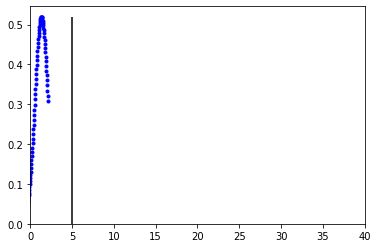

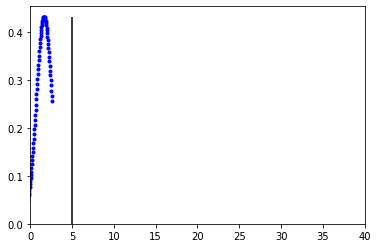

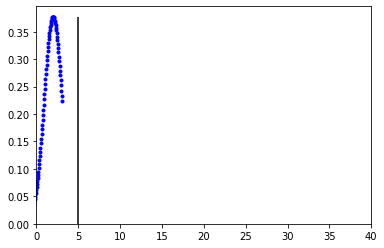

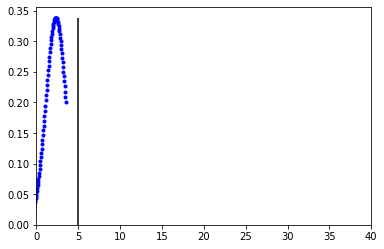

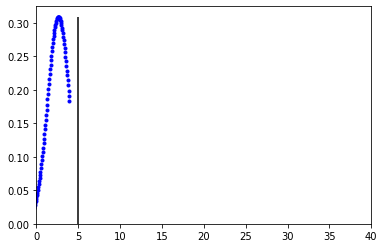

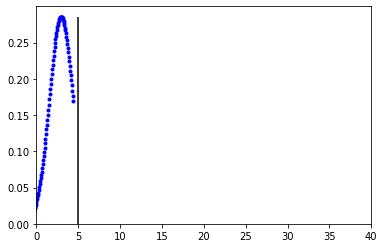

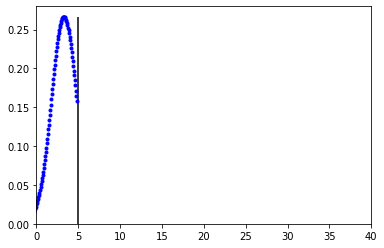

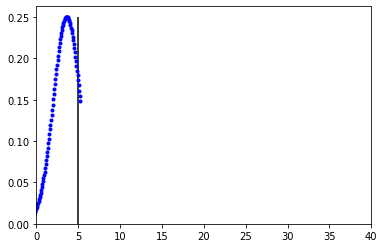

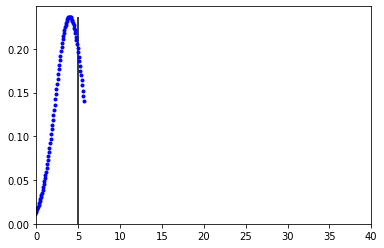

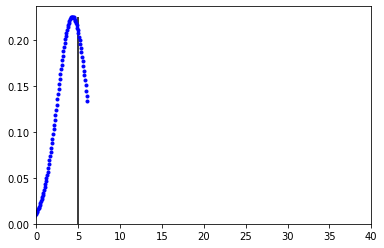

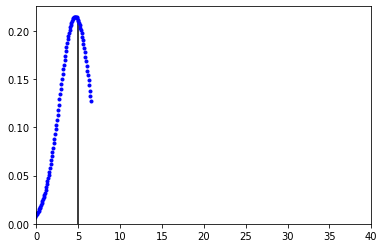

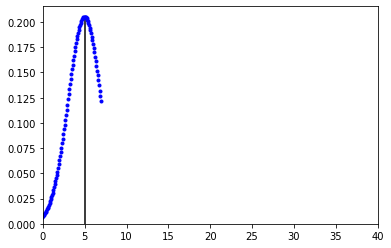

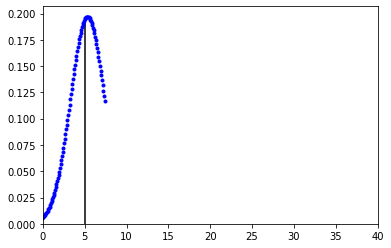

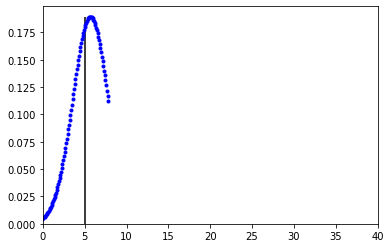

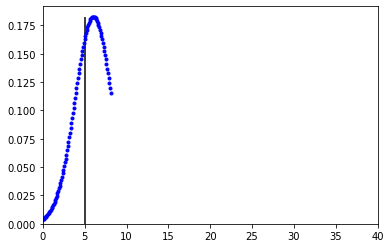

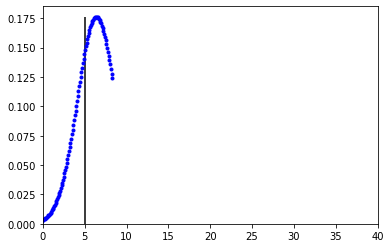

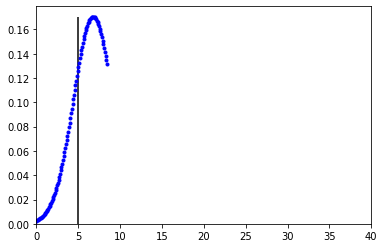

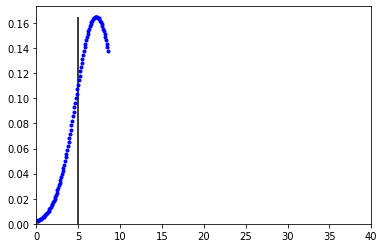

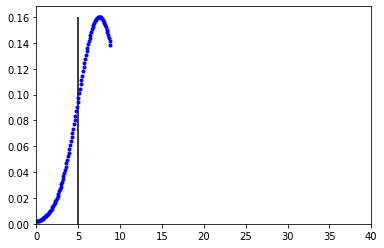

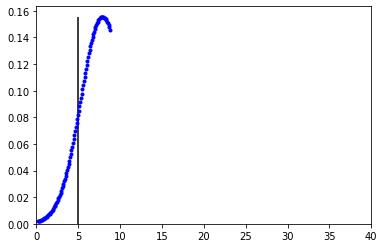

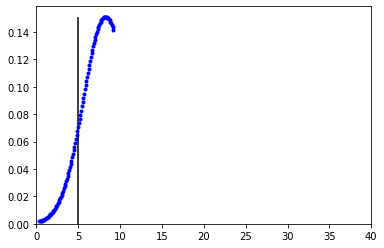

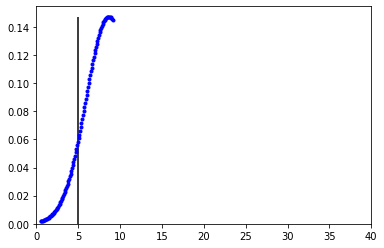

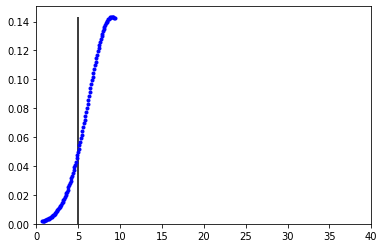

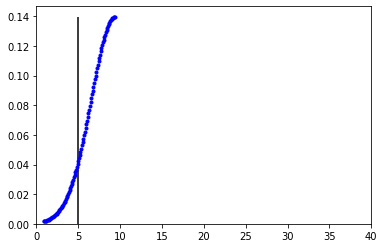

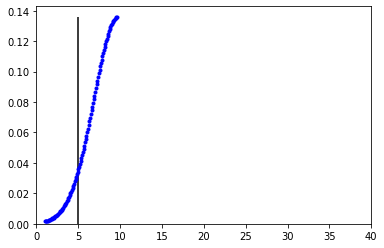

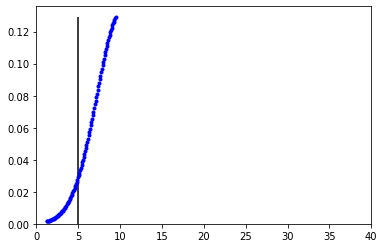

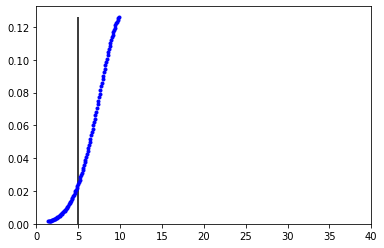

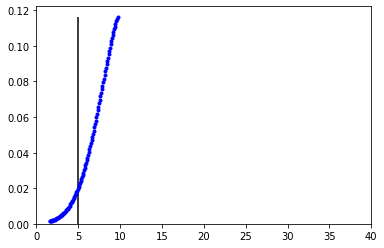

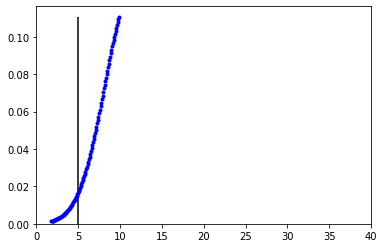

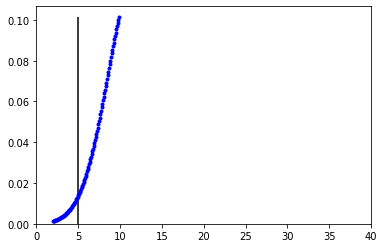

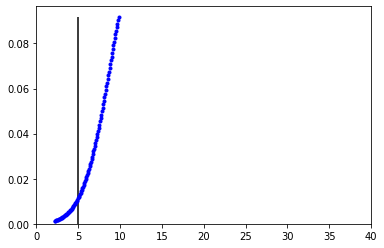

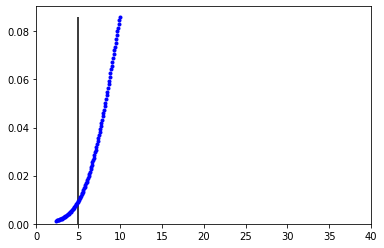

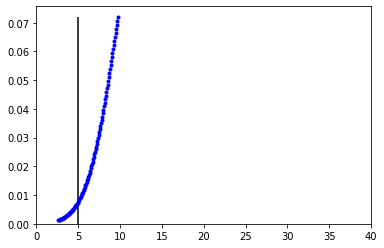

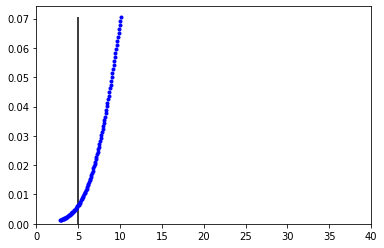

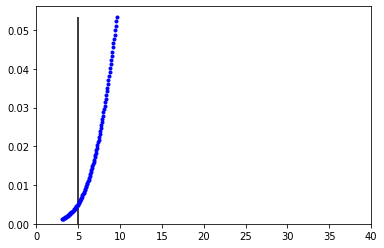

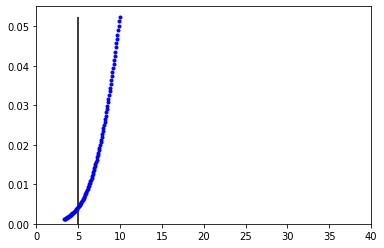

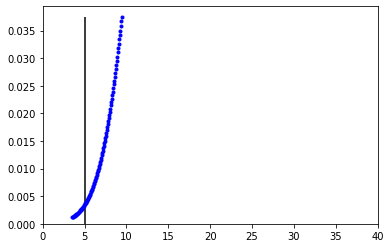

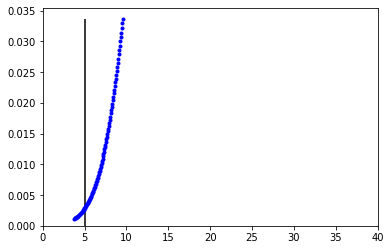

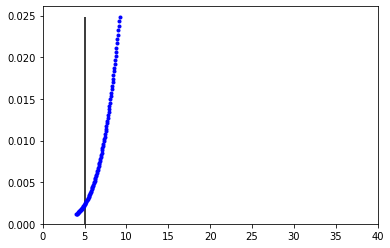

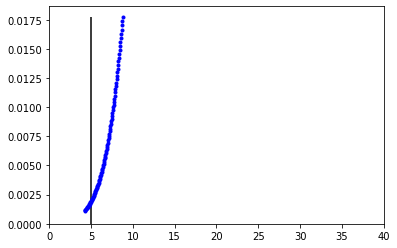

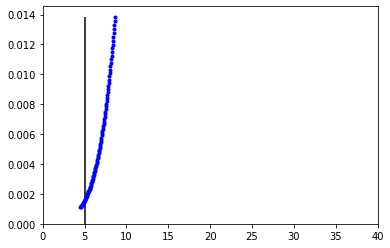

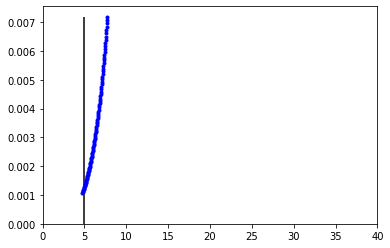

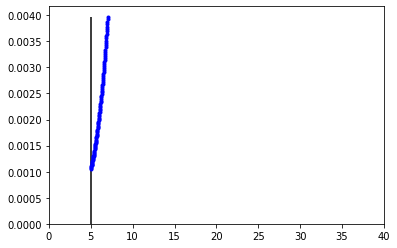

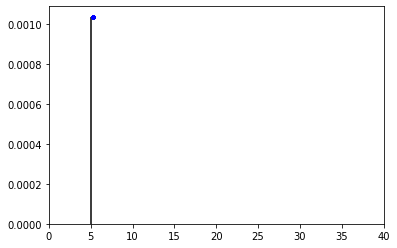

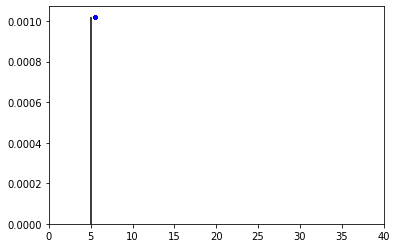

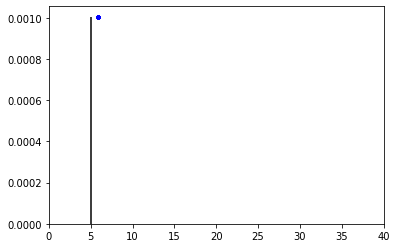

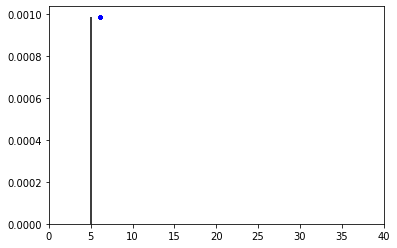

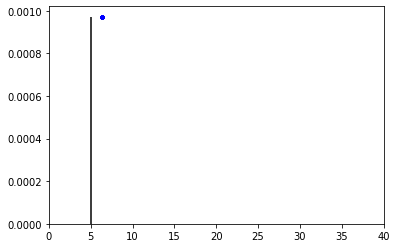

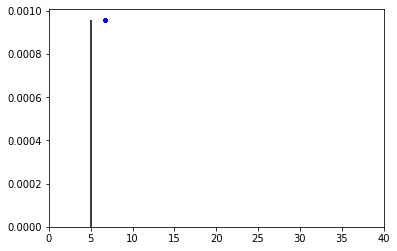

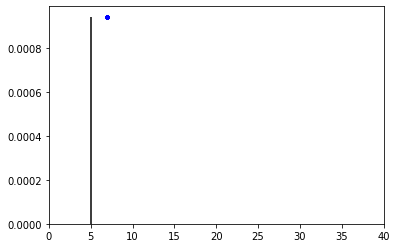

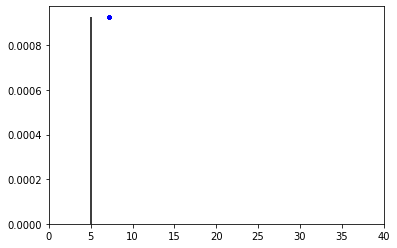

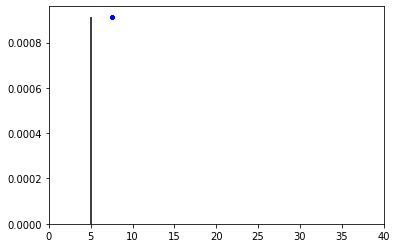

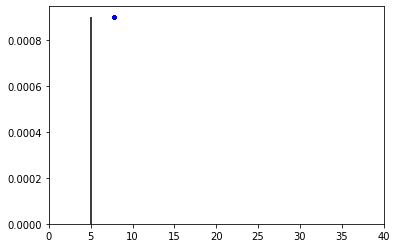

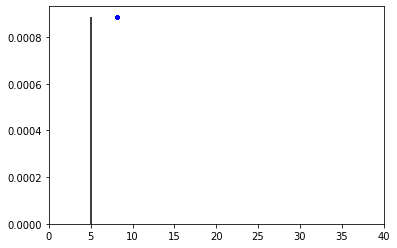

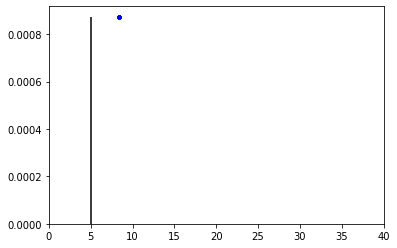

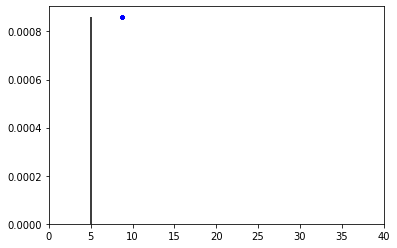

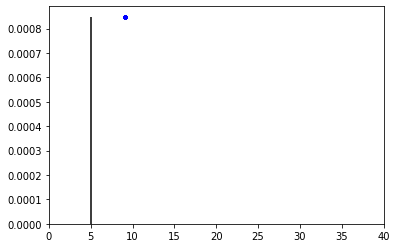

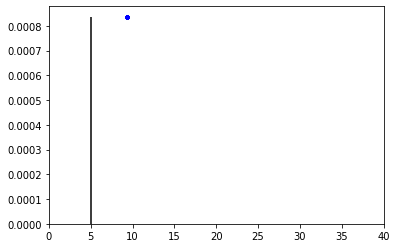

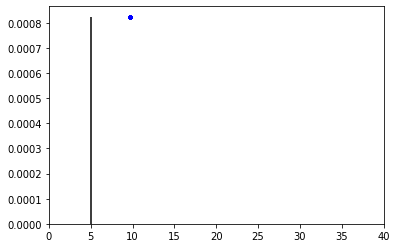

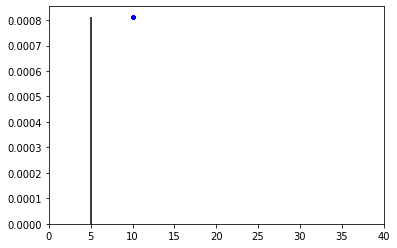

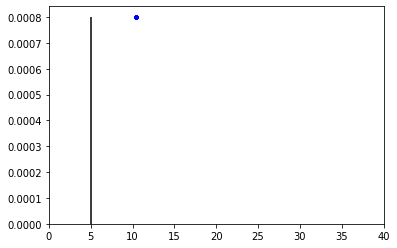

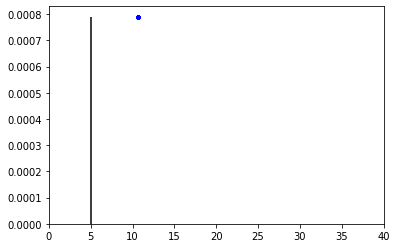

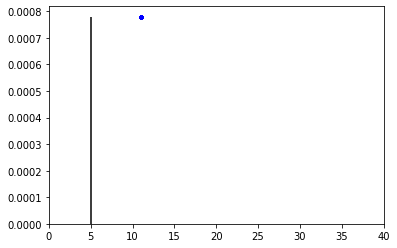

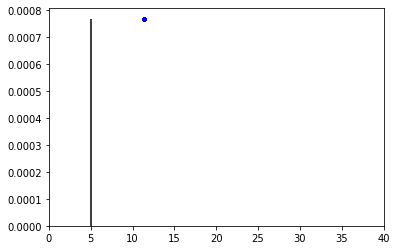

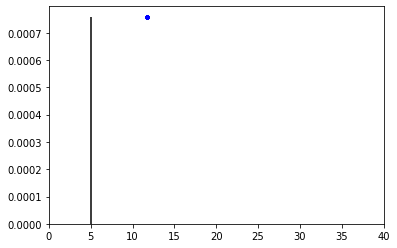

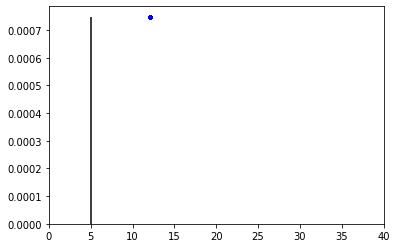

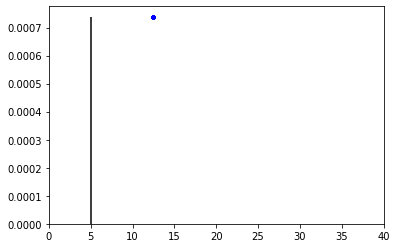

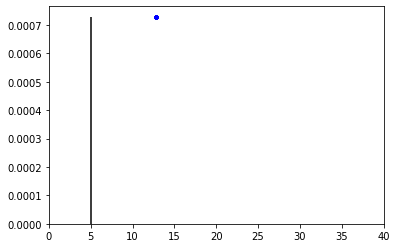

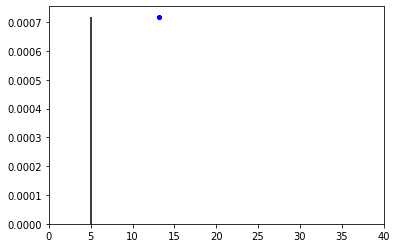

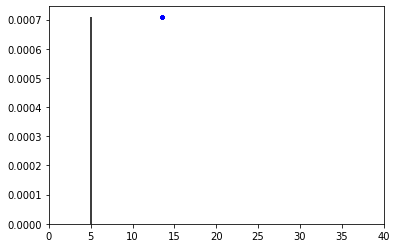

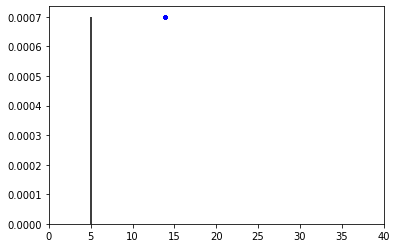

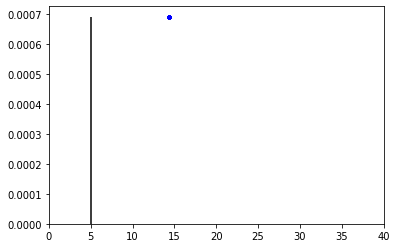

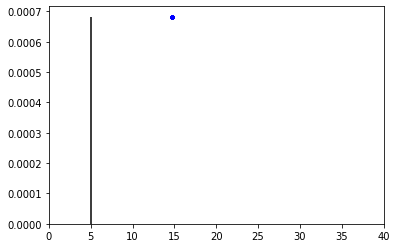

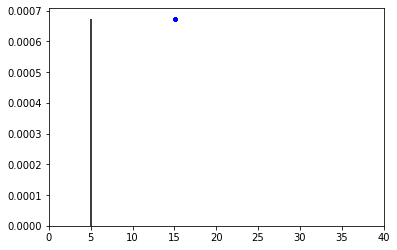

Elapsed time: 15.2104s


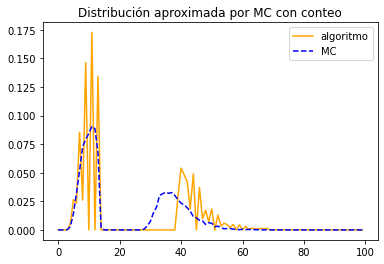

In [11]:
m = 1000 # muestras de la pdf
mm = m
m_ = m
fpt = np.zeros((N,))
no_han_pasado = np.ones((m,), dtype=int)

start = time.time()

for i in range(1, N):
    # generar pdf
    x = np.linspace(E[i] - 3 * np.sqrt(Var[i]), E[i] + 3 * np.sqrt(Var[i]) - 6 * np.sqrt(Var[i]) * (1 - m_ / mm), num=m)
#     x = np.linspace(E[i] - 3 * np.sqrt(Var[i]), E[i] + 3 * np.sqrt(Var[i]), num=m)
    PDF = norm.pdf(x, loc=E[i], scale=np.sqrt(Var[i]))
    
    aux = [PDF[j] * no_han_pasado[j] if x_ > u else 0 for j, x_ in enumerate(x)]
    
#     print('{}\t pasaron en este instante \t'.format(np.sum(no_han_pasado[x > u])),
#           '{}\t los que estan arriba en este instante'.format(np.sum(x > u)))
    
    fpt[i] = np.sum(aux)
    no_han_pasado[x > u] = 0
    m_ = m - np.sum(no_han_pasado == 0)
    
    # plotear pdf
    plt.plot(x, PDF, '.b')
#     plt.plot(x[no_han_pasado == 1], PDF[no_han_pasado == 1], '.b')
#     plt.plot(x[no_han_pasado == 0], PDF[no_han_pasado == 0], '.r')
    plt.vlines(u,0,np.max(PDF))
    plt.xlim(0, 40)
    plt.ylim(0)
#     fname = 'image_{}.png'.format(i)
#     plt.savefig(fname)
    plt.show()

end = time.time()
print('Elapsed time: {:.4f}s'.format(end - start))
plt.plot(fpt / np.sum(fpt), color='orange', label='algoritmo')
# print(np.sum(histogram_MC), M)
plt.plot(histogram_MC, 'b--', label='MC')
plt.legend()
plt.title('Distribución aproximada por MC con conteo')
plt.show()

Ahora se calculará la distribución de probabilidad con el método utilizado en el paper de FPT. Lo complejo de este paso es que el cálculo de la matriz es complejo y cambiará según el intervalo en que se encuentre. Ahora, como ya se calculó la media y la varianza de cada uno de los momentos, debería ser más fácil calcular los elementos de la matriz.

In [4]:
# se definen las funciones para calcular la esperanza y la varianza en tiempo dado y dada una condicion
# inicial conocida
def E_(t, dt, x_=None):
    x = 0

    for i in range(dt):
        if t + i >= I and t + i < J: x += b1**(i - (I - t)) * a1**i
        else: x += a1**i
    x *= K
    
    if x_ is not None: x += (a1**dt) * x_
    else: x += (a1**dt) * proceso[t]
    
    return x

def Var_(t, dt, x_=None):
    x = 0
    
    for i in range(dt):
        if t + i >= I and t + i < J: x += a1**(2*(i - (I - t))) * b1**(2*(i - (I - dt)))
        else: x += a1**(2*i)
        
    
    x *= sigma**2
    
    return x


0.99
 0.0

 1.0000000479118676


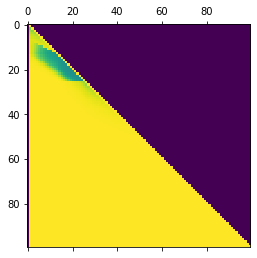

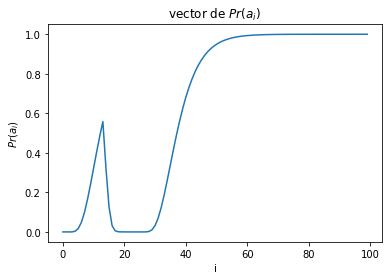

In [5]:
### DEFINICION DE INTEGRANDO PARA CALCULO DE THETA ###
def integrand(x, n, i, j):

    aux = norm.pdf( x , loc=E[j], scale=np.sqrt(Var[j] )) # bien
    
    aux *= 1 - norm.cdf(u, loc=E_(i, i - j, x), scale=np.sqrt(Var_(i, i - j, x)) )
    return aux


### CALCULO DE DISTRIBUCION DE ACUERDO AL PAPER ###
k = N ######################### cantidad de iteraciones
A = np.zeros((k,)) ################ vector de Pr(a)
theta = np.zeros((k,k)) ########### matriz theta
theta[0,0] = 1

for i in range(1,k):
    
    A[i] = 1 - norm.cdf(u, loc=E[i], scale=np.sqrt(Var[i])) # bien
    
    theta[i, i] = 1
    print('\r{:.2f}'.format(i/k), end='', flush=True)
    
    for j in range(1,i): # i,j
        
        aux = 1 - norm.cdf(u, loc=E[j], scale=np.sqrt(Var[j]))
        
#         print(aux)
        ### se agrega para que no colapse el calculo, ya que si la probabilidad es nula
        ## el valor final tambien debe ser nulo, solo en el caso de que realmente sea nulo
        # fix
        if aux == 0:
            theta[i, j] = 0
        else:
            theta[i, j] = 1 / aux
            # este metodo se debe aproximar por un calculo discreto
            integral = integrate.quad(integrand, u, np.inf, args=(0, i, j))
#             print(integral)
            theta[i, j] *= integral[0]
#             theta[i, j] = 1
            
print('\n',np.min(theta))
print('\n',np.max(theta))
plt.matshow(theta)
plt.show()
plt.plot(A), plt.title('vector de $Pr(a_i)$'), plt.ylabel('$Pr(a_i)$'), plt.xlabel('i')
plt.show()

0.9999970955541009


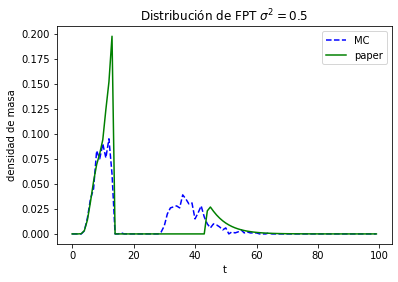

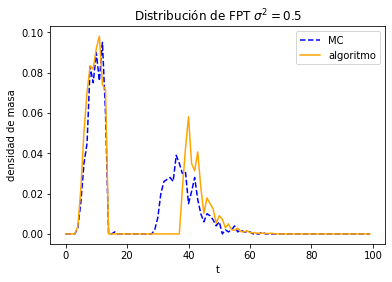

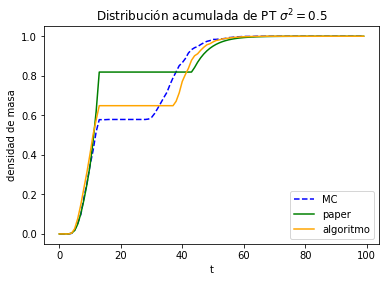

In [6]:
### CALCULO SIMPLE DE PROBABILIDAD PARA FPT ###
P_h = np.zeros((N,))
P_f = np.zeros((N,))
P = np.zeros((N + 1,))

P_h[0] = 1
P_f[0] = 0

for i in range(1,N):
    P_f[i] = norm.cdf((E[i] - u) / np.sqrt(Var[i]))
    P_h[i] = (1 - P_f[i - 1]) * P_h[i - 1]
    P[i] = P_f[i] * P_h[i]
P[len(P) - 1] = 1 - np.sum(P[: len(P) - 1])

### CALCULO DE FORMA MATRICIAL DE LA DISTRIBUCION DE PROBABILIDAD DE ACUERDO A PAPER
# q = np.matmul(np.linalg.inv(theta), A)

## calculo de q de forma recursiva
q = np.zeros((N,))
for i in range(k):
    aux = 0
    for j in range(i):
        aux += theta[i,j] * q[j]
    q[i] = A[i] - aux
    if q[i] < 0: q[i] = 0

print(np.sum(q))

plt.plot(histogram_MC, 'b--', label='MC')
plt.plot(np.array(range(len(q))), q, label='paper', color='green')
# plt.plot(fpt / np.sum(fpt), label='algoritmo', color='orange')
plt.xlabel('t')
# plt.vlines(np.where(proceso >= u)[0][0] - n, 0, np.max(q), color='r', label='FPT proceso')
# plt.plot(P, 'go', label='simple prediction')
plt.ylabel('densidad de masa')
plt.title('Distribución de FPT $\sigma^2 =${}'.format(sigma))
plt.legend(loc='best')
plt.show()

plt.plot(histogram_MC, 'b--', label='MC')
# plt.plot(np.array(range(len(q))), q, label='paper', color='green')
plt.plot(fpt / np.sum(fpt), label='algoritmo', color='orange')
plt.xlabel('t')
# plt.vlines(np.where(proceso >= u)[0][0] - n, 0, np.max(q), color='r', label='FPT proceso')
# plt.plot(P, 'go', label='simple prediction')
plt.ylabel('densidad de masa')
plt.title('Distribución de FPT $\sigma^2 =${}'.format(sigma))
plt.legend(loc='best')
plt.show()

# calculo de densidades acumuladas
a_MC = np.zeros((N,))
a_paper = np.zeros((N,))
a_filtro = np.zeros((N,))

a_MC[0] = histogram_MC[0] / np.sum(histogram_MC)
a_paper[0] = q[0]
a_filtro[0] = fpt[0] / np.sum(fpt)

for i in range(1,N):
    a_MC[i] = a_MC[i - 1] + histogram_MC[i]
    a_paper[i] = a_paper[i - 1] + q[i]
    a_filtro[i] = a_filtro[i - 1] + fpt[i] / np.sum(fpt)

plt.plot(a_MC, 'b--', label='MC')
plt.plot(np.array(range(len(q))), a_paper, label='paper', color='green')
plt.plot(a_filtro, label='algoritmo', color='orange')
plt.xlabel('t')
# plt.vlines(np.where(proceso >= u)[0][0] - n, 0, np.max(q), color='r', label='FPT proceso')
plt.ylabel('densidad de masa')
plt.title('Distribución acumulada de PT $\sigma^2 =${}'.format(sigma))
plt.legend(loc='best')
plt.show()

